## Standard Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [ ]:
## fill na and then pre process

## read training AML file

In [5]:
aml_data = pd.read_csv('AMLTraining.csv',sep=',')

In [6]:
aml_data.shape

(2872, 4)

In [7]:
aml_data.head(10)

,FCSFileName,TubeNumber,SampleNumber,Label
0,1,1,1,normal
1,2,2,1,normal
2,3,3,1,normal
3,4,4,1,normal
4,5,5,1,normal
5,6,6,1,normal
6,7,7,1,normal
7,8,8,1,normal
8,9,1,2,normal
9,10,2,2,normal


In [8]:
aml_data.describe()

,FCSFileName,TubeNumber,SampleNumber
count,2872.000000,2872.000000,2872.000000
mean,1436.500000,4.500000,180.000000
std,829.219312,2.291687,103.652018
min,1.000000,1.000000,1.000000
25%,718.750000,2.750000,90.000000
50%,1436.500000,4.500000,180.000000
75%,2154.250000,6.250000,270.000000
max,2872.000000,8.000000,359.000000


In [9]:
aml_data[aml_data.Label == 'normal'].shape

(1248, 4)

In [10]:
aml_data[aml_data.Label == 'normal'].head()

,FCSFileName,TubeNumber,SampleNumber,Label
0,1,1,1,normal
1,2,2,1,normal
2,3,3,1,normal
3,4,4,1,normal
4,5,5,1,normal


In [11]:
1248/8

156.0

In [12]:
aml_data[aml_data.Label == 'aml'].shape

(184, 4)

In [13]:
aml_data[aml_data.Label == 'aml'].head()

,FCSFileName,TubeNumber,SampleNumber,Label
32,33,1,5,aml
33,34,2,5,aml
34,35,3,5,aml
35,36,4,5,aml
36,37,5,5,aml


In [14]:
184/8

23.0

In [15]:
156+23

179

In [16]:
## test samples

In [17]:
aml_data['Label'].unique()

array(['normal', 'aml', nan], dtype=object)

In [18]:
for i in range(aml_data.shape[0]):
    if aml_data['Label'][i] not in ['aml','normal']:
        aml_data['Label'][i] = 'zero'

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
aml_data['Label'].unique()

array(['normal', 'aml', 'zero'], dtype=object)

In [20]:
aml_data[aml_data.Label == 'zero'].shape

(1440, 4)

In [21]:
aml_data[aml_data.Label == 'zero'].head()

,FCSFileName,TubeNumber,SampleNumber,Label
1432,1433,1,180,zero
1433,1434,2,180,zero
1434,1435,3,180,zero
1435,1436,4,180,zero
1436,1437,5,180,zero


In [22]:
## train labels
aml_data_train = aml_data[aml_data.Label != 'zero'].copy()

In [23]:
aml_data_train.shape

(1432, 4)

In [24]:
train_list = sorted(aml_data_train.FCSFileName.values.tolist())

In [25]:
len(train_list)

1432

In [26]:
train_list[:20]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [27]:
train_list[-1]

1432

In [28]:
## test labels
aml_data_test = aml_data[aml_data.Label == 'zero'].copy()

In [29]:
aml_data_test.shape

(1440, 4)

In [30]:
test_list = sorted(aml_data_test.FCSFileName.values.tolist())
len(test_list)

1440

In [31]:
test_list[:20]

[1433,
 1434,
 1435,
 1436,
 1437,
 1438,
 1439,
 1440,
 1441,
 1442,
 1443,
 1444,
 1445,
 1446,
 1447,
 1448,
 1449,
 1450,
 1451,
 1452]

In [32]:
test_list[-1]

2872

## raw data pre processing

In [2]:
import os

In [3]:
path, dirs, files = next(os.walk("./CSV/"))
file_count = len(files)

In [4]:
file_count

2872

In [5]:
from os import walk

In [6]:
files = sorted(files)

In [7]:
files[0]

'0001.CSV'

In [8]:
files[2360],files[2871]

('2361.CSV', '2872.CSV')

In [9]:
## 500 at a time

In [11]:
df_list = []

In [12]:
for i in range(2360,2872):
    df = pd.read_csv(f'./CSV/{files[i]}',sep=',')
    df_list.append(df)

In [13]:
len(df_list)

512

In [14]:
df_list[0].shape

(29049, 7)

In [15]:
df_comb = pd.DataFrame()

In [16]:
for i in range(len(df_list)):
    x = df_list[i]
    x['ID'] = i+2360+1
    df_comb = df_comb.append(x)

In [17]:
df_comb.shape

(13324564, 8)

In [18]:
df_comb.head()

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log,ID
0,703,0.625556,0.239778,0.177625,0.534585,0.213405,0.199492,2361
1,677,0.659933,0.269957,0.293076,0.509204,0.203733,0.141602,2361
2,918,0.625556,0.337407,0.288207,0.551688,0.160502,0.214950,2361
3,629,0.602538,0.246862,0.192741,0.535488,0.140279,0.140279,2361
4,176,0.405663,0.200890,0.164940,0.267122,0.171243,0.154851,2361


In [19]:
df_comb.dtypes

FS Lin       int64
SS Log     float64
FL1 Log    float64
FL2 Log    float64
FL3 Log    float64
FL4 Log    float64
FL5 Log    float64
ID           int64
dtype: object

In [20]:
df_comb_mean = pd.DataFrame()

In [21]:
df_comb_mean['ID'] = pd.Series([x+1 for x in range(2360,2872)])

In [22]:
df_comb_mean[['FS Lin','SS Log','FL1 Log','FL2 Log','FL3 Log','FL4 Log','FL5 Log']] = np.nan

In [23]:
df_comb_mean

,ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,2361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
507,2868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,2869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
for i in range(len(df_list)):
    df = df_comb[df_comb.ID == i+2360+1]
    cols = df.columns[:-1].tolist()
    for col in cols:
        col_m = df[col].mean()
        df_comb_mean[col][i] = col_m

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/ppjprspy37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kavi/anaconda3/envs/pp

In [25]:
df_comb_mean.tail()

,ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
507,2868,535.148326,0.584678,0.565842,0.487892,0.584601,0.360984,0.183908
508,2869,531.122820,0.584919,0.371969,0.437240,0.593453,0.282514,0.377876
509,2870,534.170525,0.585394,0.386405,0.316586,0.595179,0.188771,0.348597
510,2871,516.839742,0.580930,0.357280,0.300590,0.588583,0.224235,0.233621
511,2872,563.586544,0.590594,0.343537,0.298784,0.295554,0.198099,0.174882


In [26]:
df_comb_mean.to_csv('aml_mean_v17.csv',sep='\t',index=False)

In [38]:
1432/8

179.0

In [33]:
## import diff files and merge

In [36]:
df_list = []

In [37]:
for i in range(17):
    df = pd.read_csv(f'aml_mean_v{i+1}.csv',sep='\t')
    df_list.append(df)

In [38]:
len(df_list)

17

In [39]:
df_list[0].head()

,ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1,663.982311,0.554379,0.205182,0.202277,0.589269,0.181832,0.161980
1,2,647.846675,0.551979,0.355550,0.376491,0.588194,0.178982,0.179637
2,3,654.394432,0.552958,0.321500,0.255099,0.587023,0.241918,0.265074
3,4,649.450761,0.551180,0.428255,0.419017,0.585546,0.444936,0.178783
4,5,653.504435,0.555380,0.251429,0.390378,0.586974,0.252383,0.281717


In [40]:
df_comb = pd.DataFrame()

In [41]:
for i in range(len(df_list)):
    x = df_list[i]
    df_comb = df_comb.append(x)

In [42]:
df_comb.shape

(2872, 8)

In [43]:
df_comb.head()

,ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1,663.982311,0.554379,0.205182,0.202277,0.589269,0.181832,0.161980
1,2,647.846675,0.551979,0.355550,0.376491,0.588194,0.178982,0.179637
2,3,654.394432,0.552958,0.321500,0.255099,0.587023,0.241918,0.265074
3,4,649.450761,0.551180,0.428255,0.419017,0.585546,0.444936,0.178783
4,5,653.504435,0.555380,0.251429,0.390378,0.586974,0.252383,0.281717


In [44]:
df_comb.tail()

,ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
507,2868,535.148326,0.584678,0.565842,0.487892,0.584601,0.360984,0.183908
508,2869,531.122820,0.584919,0.371969,0.437240,0.593453,0.282514,0.377876
509,2870,534.170525,0.585394,0.386405,0.316586,0.595179,0.188771,0.348597
510,2871,516.839742,0.580930,0.357280,0.300590,0.588583,0.224235,0.233621
511,2872,563.586544,0.590594,0.343537,0.298784,0.295554,0.198099,0.174882


In [58]:
## log transform

In [45]:
df_log = (np.log(df_comb)).replace(-np.inf, 0)

In [46]:
df_log.shape

(2872, 8)

In [47]:
df_log

,ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,0.000000,6.498256,-0.589906,-1.583856,-1.598119,-0.528873,-1.704671,-1.820285
1,0.693147,6.473654,-0.594246,-1.034089,-0.976860,-0.530698,-1.720470,-1.716816
2,1.098612,6.483710,-0.592473,-1.134757,-1.366103,-0.532692,-1.419158,-1.327746
3,1.386294,6.476127,-0.595694,-0.848035,-0.869845,-0.535211,-0.809825,-1.721583
4,1.609438,6.482349,-0.588103,-1.380593,-0.940641,-0.532774,-1.376808,-1.266853
...,...,...,...,...,...,...,...,...
507,7.961370,6.282544,-0.536694,-0.569440,-0.717662,-0.536826,-1.018922,-1.693318
508,7.961719,6.274993,-0.536281,-0.988944,-0.827274,-0.521797,-1.264027,-0.973189
509,7.962067,6.280715,-0.535471,-0.950869,-1.150160,-0.518892,-1.667220,-1.053839
510,7.962416,6.247733,-0.543125,-1.029235,-1.202009,-0.530037,-1.495063,-1.454056


In [48]:
del df_log['ID']

In [49]:
df_log = df_log.reset_index()

In [50]:
df_log['index'] += 1

In [51]:
df_log.columns = ['ID', 'FS Lin', 'SS Log', 'FL1 Log', 'FL2 Log', 'FL3 Log', 'FL4 Log',
       'FL5 Log']

In [52]:
df_log.head(8)

,ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1,6.498256,-0.589906,-1.583856,-1.598119,-0.528873,-1.704671,-1.820285
1,2,6.473654,-0.594246,-1.034089,-0.976860,-0.530698,-1.720470,-1.716816
2,3,6.483710,-0.592473,-1.134757,-1.366103,-0.532692,-1.419158,-1.327746
3,4,6.476127,-0.595694,-0.848035,-0.869845,-0.535211,-0.809825,-1.721583
4,5,6.482349,-0.588103,-1.380593,-0.940641,-0.532774,-1.376808,-1.266853
5,6,6.479328,-0.585508,-1.438084,-1.547186,-0.540598,-1.615060,-1.170024
6,7,6.468036,-0.586693,-1.237678,-1.422843,-0.534542,-1.274004,-1.288068
7,8,6.467244,-0.591240,-1.543398,-1.553746,-1.487248,-1.778042,-1.831407


In [53]:
df_log.shape

(2872, 8)

In [75]:
## less columns of df_log

In [54]:
df_log.columns

Index(['ID', 'FS Lin', 'SS Log', 'FL1 Log', 'FL2 Log', 'FL3 Log', 'FL4 Log',
       'FL5 Log'],
      dtype='object')

In [55]:
df_log_new = df_log[['FS Lin', 'SS Log', 'FL1 Log', 'FL2 Log', 'FL3 Log', 'FL4 Log', 'FL5 Log']].copy()

In [56]:
df_log_new.head()

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,6.498256,-0.589906,-1.583856,-1.598119,-0.528873,-1.704671,-1.820285
1,6.473654,-0.594246,-1.034089,-0.976860,-0.530698,-1.720470,-1.716816
2,6.483710,-0.592473,-1.134757,-1.366103,-0.532692,-1.419158,-1.327746
3,6.476127,-0.595694,-0.848035,-0.869845,-0.535211,-0.809825,-1.721583
4,6.482349,-0.588103,-1.380593,-0.940641,-0.532774,-1.376808,-1.266853


In [57]:
df_log_new_norm = df_log_new.copy()

In [58]:
for i in range(2872):
    for j in range(i-7,i):
        #print(i,j)
        if ((i+1)%8 == 0):
            df_log_new_norm.iloc[j] = df_log_new_norm.iloc[j] / df_log_new_norm.iloc[i]

In [59]:
df_log_new_norm.head(8)

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1.004795,0.997744,1.026214,1.028559,0.355605,0.958735,0.993927
1,1.000991,1.005083,0.670008,0.628713,0.356832,0.967620,0.937430
2,1.002546,1.002084,0.735233,0.879232,0.358173,0.798158,0.724987
3,1.001373,1.007533,0.549460,0.559837,0.359867,0.455459,0.940033
4,1.002336,0.994694,0.894516,0.605402,0.358229,0.774339,0.691738
5,1.001868,0.990305,0.931765,0.995778,0.363489,0.908336,0.638866
6,1.000122,0.992308,0.801918,0.915750,0.359417,0.716521,0.703322
7,6.467244,-0.591240,-1.543398,-1.553746,-1.487248,-1.778042,-1.831407


In [60]:
df_log_new.to_csv('df_log_new_final.csv',sep='\t',index=False)

In [61]:
df_log_new_norm.to_csv('df_log_new_norm_final.csv',sep='\t',index=False)

In [62]:
## further steps

In [63]:
test_norm = df_log_new_norm[~df_log_new_norm.index.isin(df_log_new_norm.iloc[7::8].index.tolist())].copy()

In [64]:
test_norm.shape

(2513, 7)

In [65]:
test_norm.head(10)

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1.004795,0.997744,1.026214,1.028559,0.355605,0.958735,0.993927
1,1.000991,1.005083,0.670008,0.628713,0.356832,0.967620,0.937430
2,1.002546,1.002084,0.735233,0.879232,0.358173,0.798158,0.724987
3,1.001373,1.007533,0.549460,0.559837,0.359867,0.455459,0.940033
4,1.002336,0.994694,0.894516,0.605402,0.358229,0.774339,0.691738
5,1.001868,0.990305,0.931765,0.995778,0.363489,0.908336,0.638866
6,1.000122,0.992308,0.801918,0.915750,0.359417,0.716521,0.703322
8,0.997316,1.024707,1.022193,1.014064,0.513672,0.940773,0.982671
9,0.994931,1.025715,0.888747,0.769203,0.518334,1.002080,0.921933
10,0.996987,1.013255,0.838053,0.954322,0.521152,0.921166,0.887080


In [66]:
test_norm = test_norm.reset_index(drop=True)

In [67]:
test_norm = test_norm.reset_index()

In [68]:
test_norm.head(10)

,index,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,0,1.004795,0.997744,1.026214,1.028559,0.355605,0.958735,0.993927
1,1,1.000991,1.005083,0.670008,0.628713,0.356832,0.967620,0.937430
2,2,1.002546,1.002084,0.735233,0.879232,0.358173,0.798158,0.724987
3,3,1.001373,1.007533,0.549460,0.559837,0.359867,0.455459,0.940033
4,4,1.002336,0.994694,0.894516,0.605402,0.358229,0.774339,0.691738
5,5,1.001868,0.990305,0.931765,0.995778,0.363489,0.908336,0.638866
6,6,1.000122,0.992308,0.801918,0.915750,0.359417,0.716521,0.703322
7,7,0.997316,1.024707,1.022193,1.014064,0.513672,0.940773,0.982671
8,8,0.994931,1.025715,0.888747,0.769203,0.518334,1.002080,0.921933
9,9,0.996987,1.013255,0.838053,0.954322,0.521152,0.921166,0.887080


In [69]:
test_norm['index'] += 1

In [70]:
test_norm.head(10)

,index,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1,1.004795,0.997744,1.026214,1.028559,0.355605,0.958735,0.993927
1,2,1.000991,1.005083,0.670008,0.628713,0.356832,0.967620,0.937430
2,3,1.002546,1.002084,0.735233,0.879232,0.358173,0.798158,0.724987
3,4,1.001373,1.007533,0.549460,0.559837,0.359867,0.455459,0.940033
4,5,1.002336,0.994694,0.894516,0.605402,0.358229,0.774339,0.691738
5,6,1.001868,0.990305,0.931765,0.995778,0.363489,0.908336,0.638866
6,7,1.000122,0.992308,0.801918,0.915750,0.359417,0.716521,0.703322
7,8,0.997316,1.024707,1.022193,1.014064,0.513672,0.940773,0.982671
8,9,0.994931,1.025715,0.888747,0.769203,0.518334,1.002080,0.921933
9,10,0.996987,1.013255,0.838053,0.954322,0.521152,0.921166,0.887080


In [71]:
test_norm.columns = ['row_ID', 'FS Lin', 'SS Log', 'FL1 Log', 'FL2 Log', 'FL3 Log', 'FL4 Log',
       'FL5 Log']

In [72]:
test_norm.head(10)

,row_ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1,1.004795,0.997744,1.026214,1.028559,0.355605,0.958735,0.993927
1,2,1.000991,1.005083,0.670008,0.628713,0.356832,0.967620,0.937430
2,3,1.002546,1.002084,0.735233,0.879232,0.358173,0.798158,0.724987
3,4,1.001373,1.007533,0.549460,0.559837,0.359867,0.455459,0.940033
4,5,1.002336,0.994694,0.894516,0.605402,0.358229,0.774339,0.691738
5,6,1.001868,0.990305,0.931765,0.995778,0.363489,0.908336,0.638866
6,7,1.000122,0.992308,0.801918,0.915750,0.359417,0.716521,0.703322
7,8,0.997316,1.024707,1.022193,1.014064,0.513672,0.940773,0.982671
8,9,0.994931,1.025715,0.888747,0.769203,0.518334,1.002080,0.921933
9,10,0.996987,1.013255,0.838053,0.954322,0.521152,0.921166,0.887080


In [73]:
test_norm.shape

(2513, 8)

In [74]:
test_norm.tail()

,row_ID,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
2508,2509,0.989274,1.018992,0.858880,0.956190,0.427122,0.984341,0.906711
2509,2510,0.991826,1.019118,0.532954,0.594074,0.440418,0.629358,0.971137
2510,2511,0.990634,1.018335,0.925578,0.684809,0.428087,0.780752,0.558135
2511,2512,0.991537,1.016796,0.889943,0.952091,0.425705,1.029792,0.604389
2512,2513,0.986330,1.031330,0.963288,0.995011,0.434848,0.923456,0.833917


In [75]:
aml_data.head()

,FCSFileName,TubeNumber,SampleNumber,Label
0,1,1,1,normal
1,2,2,1,normal
2,3,3,1,normal
3,4,4,1,normal
4,5,5,1,normal


In [76]:
aml_data_test = aml_data.copy()

In [77]:
aml_data_test.shape

(2872, 4)

In [78]:
aml_data_mod = aml_data_test[~aml_data_test.index.isin(aml_data_test.iloc[7::8].index.tolist())].copy()

In [79]:
aml_data_mod.shape

(2513, 4)

In [80]:
aml_data_mod.head()

,FCSFileName,TubeNumber,SampleNumber,Label
0,1,1,1,normal
1,2,2,1,normal
2,3,3,1,normal
3,4,4,1,normal
4,5,5,1,normal


In [81]:
aml_data_mod = aml_data_mod.reset_index(drop=True)

In [82]:
aml_data_mod = aml_data_mod.reset_index()

In [83]:
aml_data_mod.head(10)

,index,FCSFileName,TubeNumber,SampleNumber,Label
0,0,1,1,1,normal
1,1,2,2,1,normal
2,2,3,3,1,normal
3,3,4,4,1,normal
4,4,5,5,1,normal
5,5,6,6,1,normal
6,6,7,7,1,normal
7,7,9,1,2,normal
8,8,10,2,2,normal
9,9,11,3,2,normal


In [84]:
aml_data_mod['index'] += 1

In [85]:
aml_data_mod.columns

Index(['index', 'FCSFileName', 'TubeNumber', 'SampleNumber', 'Label'], dtype='object')

In [86]:
aml_data_mod.columns = ['row_ID', 'FCSFileName', 'TubeNumber', 'SampleNumber', 'Label']

In [87]:
aml_data_mod.head(10)

,row_ID,FCSFileName,TubeNumber,SampleNumber,Label
0,1,1,1,1,normal
1,2,2,2,1,normal
2,3,3,3,1,normal
3,4,4,4,1,normal
4,5,5,5,1,normal
5,6,6,6,1,normal
6,7,7,7,1,normal
7,8,9,1,2,normal
8,9,10,2,2,normal
9,10,11,3,2,normal


In [88]:
merge_df = aml_data_mod.merge(test_norm,on='row_ID')

In [89]:
merge_df.shape

(2513, 12)

In [90]:
merge_df.head()

,row_ID,FCSFileName,TubeNumber,SampleNumber,Label,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
0,1,1,1,1,normal,1.004795,0.997744,1.026214,1.028559,0.355605,0.958735,0.993927
1,2,2,2,1,normal,1.000991,1.005083,0.670008,0.628713,0.356832,0.967620,0.937430
2,3,3,3,1,normal,1.002546,1.002084,0.735233,0.879232,0.358173,0.798158,0.724987
3,4,4,4,1,normal,1.001373,1.007533,0.549460,0.559837,0.359867,0.455459,0.940033
4,5,5,5,1,normal,1.002336,0.994694,0.894516,0.605402,0.358229,0.774339,0.691738


In [91]:
merge_df.Label.unique()

array(['normal', 'aml', 'zero'], dtype=object)

In [92]:
merge_df.to_csv('merge_df_aml_final.csv',sep='\t',index=False)

In [114]:
len(merge_df.FCSFileName.values.tolist()[1253:])

1260

In [105]:
1253+179

1432

In [106]:
a_list = merge_df.FCSFileName.values.tolist()[:1253]

In [115]:
b_list = merge_df.FCSFileName.values.tolist()[1253:]

In [117]:
merge_df.tail(1260)

,row_ID,FCSFileName,TubeNumber,SampleNumber,Label,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
1253,1254,1433,1,180,zero,0.999433,1.007723,1.012713,0.983906,0.405462,0.981781,0.989210
1254,1255,1434,2,180,zero,0.999444,1.007350,0.802648,0.669653,0.409891,1.017935,0.894719
1255,1256,1435,3,180,zero,0.999911,1.002863,0.768295,0.930439,0.402770,0.931054,0.874021
1256,1257,1436,4,180,zero,0.991506,1.050516,0.594730,0.641954,0.401966,0.499396,0.883840
1257,1258,1437,5,180,zero,1.000438,1.000742,0.896340,0.610771,0.403324,0.841047,0.605321
...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2509,2867,3,359,zero,0.989274,1.018992,0.858880,0.956190,0.427122,0.984341,0.906711
2509,2510,2868,4,359,zero,0.991826,1.019118,0.532954,0.594074,0.440418,0.629358,0.971137
2510,2511,2869,5,359,zero,0.990634,1.018335,0.925578,0.684809,0.428087,0.780752,0.558135
2511,2512,2870,6,359,zero,0.991537,1.016796,0.889943,0.952091,0.425705,1.029792,0.604389


In [110]:
merge_df_x = merge_df.head(1253).copy()

In [118]:
merge_df_y = merge_df.tail(1260).copy()

In [119]:
merge_df_new = merge_df_x[['Label',
       'FS Lin', 'SS Log', 'FL1 Log', 'FL2 Log', 'FL3 Log', 'FL4 Log',
       'FL5 Log']].copy()

In [120]:
merge_df_new.shape

(1253, 8)

In [242]:
X = merge_df_new.drop("Label", axis=1)
Y = merge_df_new["Label"]

In [243]:
X.shape

(1253, 7)

In [244]:
Y.shape

(1253,)

In [245]:
Y.unique()

array(['normal', 'aml'], dtype=object)

In [124]:
merge_df_new[merge_df_new["Label"] == 'aml'].shape

(161, 8)

In [125]:
161/7

23.0

In [126]:
## model making

In [441]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=777)

In [442]:
X_train.shape

(1002, 7)

In [443]:
X_test.shape

(251, 7)

In [444]:
Y_train.shape

(1002,)

In [445]:
Y_test.shape

(251,)

In [133]:
# Logistic Regression
logreg = LogisticRegression()

In [134]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [135]:
Y_pred_log = logreg.predict(X_test)

In [136]:
logreg_accur=accuracy_score(Y_test, Y_pred_log)

In [137]:
logreg.score(X_train, Y_train)

0.8612774451097804

In [138]:
logreg_accur

0.9123505976095617

## SVM implement t1

In [446]:
## Support Vector Machines
## Scaling data for SVM
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [140]:
svc = SVC(probability=True)

In [141]:
svc.fit(X_train_scaled, Y_train)

SVC(probability=True)

In [142]:
Y_pred_svc = svc.predict(X_test_scaled)

In [143]:
svc.score(X_train_scaled, Y_train)

0.9041916167664671

In [144]:
svc_accur = accuracy_score(Y_test, Y_pred_svc)

In [145]:
svc_accur

0.9362549800796812

## SVM implement t2

In [146]:
svc = SVC(probability=True)

In [147]:
svc.fit(X_train, Y_train)

SVC(probability=True)

In [148]:
Y_pred_svc = svc.predict(X_test)

In [149]:
svc.score(X_train, Y_train)

0.872255489021956

In [150]:
svc_accur = accuracy_score(Y_test, Y_pred_svc)

In [151]:
svc_accur

0.9243027888446215

In [152]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=15, random_state=777)

In [153]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=15, random_state=777)

In [154]:
Y_pred_rf = random_forest.predict(X_test)

In [155]:
random_forest.score(X_train, Y_train)

0.9970059880239521

In [156]:
rf_accur = accuracy_score(Y_test, Y_pred_rf)

In [157]:
rf_accur

0.9243027888446215

In [194]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=17, random_state=807)

In [195]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=17, random_state=807)

In [196]:
Y_pred_rf = random_forest.predict(X_test)

In [197]:
random_forest.score(X_train, Y_train)

0.998003992015968

In [198]:
rf_accur = accuracy_score(Y_test, Y_pred_rf)

In [199]:
rf_accur

0.9282868525896414

In [200]:
## hyperopt

In [202]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")

In [266]:
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X)

In [267]:
X_scaled2

array([[ 1.26424508, -0.45792115,  1.31191179, ..., -1.10417771,
         0.44851611,  0.9722249 ],
       [ 0.49738   , -0.06349557, -0.91923642, ..., -1.08858886,
         0.49652501,  0.62874579],
       [ 0.81084785, -0.22465433, -0.51069046, ..., -1.07155845,
        -0.4190838 , -0.66282328],
       ...,
       [-0.48547599,  0.17072316,  0.04759229, ...,  0.18363193,
        -0.90749718, -0.43372418],
       [-0.39574371, -0.17021791,  0.42333777, ...,  0.27443886,
         0.88229529, -1.41338315],
       [-0.54503991,  0.19397835,  0.8067636 , ...,  0.21442493,
         0.44804413,  0.22140928]])

In [268]:
space = {
    "n_estimators": hp.choice("n_estimators", [10, 11, 12, 13,14,15,16,17,18,19,20]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

In [269]:
# define objective function

def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X_scaled2, Y,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [208]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [04:28<00:00,  2.68s/trial, best loss: -0.9066262948207171]
Best: {'criterion': 0, 'max_depth': 14.0, 'n_estimators': 1}


In [209]:
# n estimater = 200

In [212]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [01:41<00:00,  1.02s/trial, best loss: -0.909003984063745]
Best: {'criterion': 1, 'max_depth': 14.0, 'n_estimators': 1}


In [270]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [01:33<00:00,  1.07trial/s, best loss: -0.9074231075697211]
Best: {'criterion': 0, 'max_depth': 15.0, 'n_estimators': 9}


In [271]:
## now testing the same

In [272]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=20, random_state=777,max_depth = 15.0,criterion='entropy')

In [278]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15.0, n_estimators=20,
                       random_state=777)

In [279]:
Y_pred_rf = random_forest.predict(X_test)

In [280]:
random_forest.score(X_train, Y_train)

0.9960079840319361

In [281]:
rf_accur = accuracy_score(Y_test, Y_pred_rf)

In [282]:
rf_accur

0.9282868525896414

In [285]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=19, random_state=707,max_depth = 15.0,criterion='gini')

In [286]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15.0, n_estimators=19, random_state=707)

In [287]:
Y_pred_rf = random_forest.predict(X_test)

In [288]:
random_forest.score(X_train, Y_train)

0.9930139720558883

In [289]:
rf_accur = accuracy_score(Y_test, Y_pred_rf)

In [290]:
rf_accur

0.9322709163346613

In [321]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=19, random_state=999,max_depth = 17.0,criterion='gini')

In [322]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=17.0, n_estimators=19, random_state=999)

In [323]:
Y_pred_rf = random_forest.predict(X_test)

In [324]:
random_forest.score(X_train, Y_train)

0.9940119760479041

In [325]:
rf_accur = accuracy_score(Y_test, Y_pred_rf)

In [326]:
rf_accur

0.9243027888446215

In [213]:
## any estimator

In [214]:
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [215]:
Y.shape

(1253,)

In [216]:
len(Y)

1253

In [327]:
# Define test set size and randomly split dataset
test_size = int( 0.2 * len( Y ) )

In [328]:
np.random.seed(778)
perm = np.random.permutation(len(X))

In [222]:
from sklearn import datasets

In [ ]:
# Load breast cancer dataset
data = datasets.load_breast_cancer()

# Specify independent and dependent variables
X = data.data
y = data.target

X

Y

In [251]:
Y = Y.map({'normal': 0, 'aml': 1})

In [329]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1248    0
1249    0
1250    0
1251    0
1252    0
Name: Label, Length: 1253, dtype: int64

In [330]:
X_train = X_scaled2[perm[:-test_size]]
y_train = Y[perm[:-test_size]]
X_test  = X_scaled2[perm[-test_size:]]
y_test  = Y[perm[-test_size:]]

In [331]:
# Define the model
model = HyperoptEstimator(classifier=any_classifier('clf'),  
                          algo=tpe.suggest, 
                          trial_timeout=300)

In [332]:
# Train variations of the model
model.fit(X_train, y_train)

 88%|████████▊ | 7/8 [00:53<00:07,  7.64s/trial, best loss=?]


In [333]:
# Print best score, model, and parameters
print(model.score( X_test, y_test ) )
print(model.best_model() )

0.904
{'learner': AdaBoostClassifier(learning_rate=0.03110174700798141, n_estimators=661,
                   random_state=4), 'preprocs': (StandardScaler(with_mean=False, with_std=False),), 'ex_preprocs': ()}


In [334]:
## ret adaboost

In [335]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [336]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(Y))

In [344]:
train_X, test_X, train_y, test_y = train_test_split(X, binary_encoded_y, random_state=4)

In [345]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    learning_rate=0.03110174700798141, n_estimators=661,
                   random_state=4
)

In [346]:
classifier.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.03110174700798141, n_estimators=661,
                   random_state=4)

In [347]:
predictions = classifier.predict(test_X)

In [348]:
confusion_matrix(test_y, predictions)

array([[271,   0],
       [ 32,  11]])

In [343]:
ab_accur = accuracy_score(test_y, predictions)
ab_accur

0.8949044585987261

In [349]:
ab_accur = accuracy_score(test_y, predictions)
ab_accur

0.8980891719745223

In [350]:
## more adb

In [352]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [354]:
model = AdaBoostClassifier()

In [353]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [355]:
n_scores = cross_val_score(model, X_scaled2, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
# report performance

In [357]:
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.909 (0.020)


In [358]:
n_scores

array([0.9047619 , 0.92063492, 0.92857143, 0.888     , 0.88      ,
       0.888     , 0.92      , 0.936     , 0.92      , 0.896     ,
       0.88888889, 0.94444444, 0.88888889, 0.92      , 0.864     ,
       0.912     , 0.88      , 0.92      , 0.896     , 0.928     ,
       0.92063492, 0.88888889, 0.9047619 , 0.928     , 0.904     ,
       0.952     , 0.928     , 0.912     , 0.912     , 0.896     ])

In [359]:
len(n_scores)

30

In [360]:
cv

RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1)

In [361]:
model.fit(train_X, train_y)

AdaBoostClassifier()

In [364]:
predictions = model.predict(test_X)

In [365]:
confusion_matrix(test_y, predictions)

array([[266,   5],
       [ 27,  16]])

In [374]:
preds = logreg.predict_proba(X_test)[:,1]
metrics.roc_auc_score(Y_test, preds)

0.537316395394998

In [375]:
preds = random_forest.predict_proba(X_test)[:,1]
#fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
metrics.roc_auc_score(Y_test, preds)

0.8976776498610559

In [376]:
preds = svc.predict_proba(X_test_scaled)[:, 1]
#fpr, tpr, thresholds = metrics.roc_curve(Y_test, preds)
metrics.roc_auc_score(Y_test, preds)

0.5755260023818976

In [377]:
## feature selection

In [378]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_labels = X_train.columns

In [379]:
feature_labels

Index(['FS Lin', 'SS Log', 'FL1 Log', 'FL2 Log', 'FL3 Log', 'FL4 Log',
       'FL5 Log'],
      dtype='object')

In [380]:
# Tp 5 important features
xrange=range(5)
topimportances = importances[indices][:5]
topfeatures = feature_labels[indices][:5]  
topfeatures

Index(['FL5 Log', 'FL2 Log', 'SS Log', 'FS Lin', 'FL1 Log'], dtype='object')

In [381]:
import matplotlib

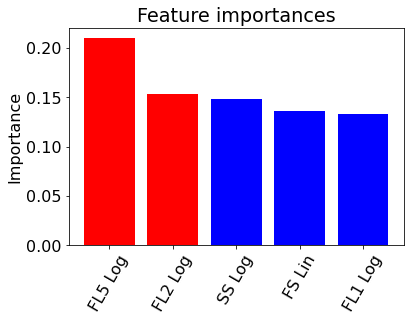

In [382]:
# Top 5 important features
matplotlib.rcParams.update({'font.size': 16})
plt.figure()
plt.title("Feature importances")
plt.bar(xrange, topimportances,
        color=['r', 'r', 'b', 'b', 'b'], align="center")
plt.xticks(xrange, topfeatures, rotation=60)
plt.ylabel('Importance') 
plt.show()

In [383]:
X_train_SS = X_train_scaled[:,1].reshape(-1, 1)
X_train_FL5 = X_train_scaled[:,6].reshape(-1, 1)

In [384]:
X_test_SS = X_test_scaled[:,1].reshape(-1, 1)
X_test_FL5 = X_test_scaled[:,6].reshape(-1, 1)

In [385]:
# Random Forests with SS
random_forest_testD = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(X_train_SS, Y_train)
Y_pred_rf_SS = random_forest.predict(X_test_SS)
random_forest.score(X_train_SS, Y_train)
rf_accur_SS = accuracy_score(Y_test, Y_pred_rf_SS)
rf_accur_SS

0.8127490039840638

In [386]:
# Random Forests with FL5
random_forest_testD = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(X_train_FL5, Y_train)
Y_pred_rf_FL5 = random_forest.predict(X_test_FL5)
random_forest.score(X_train_FL5, Y_train)
rf_accur_FL5 = accuracy_score(Y_test, Y_pred_rf_FL5)
rf_accur_FL5

0.848605577689243

In [387]:
## balanced rf

In [388]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=100, random_state=10, class_weight="balanced")
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.9402390438247012

In [389]:
confusion_matrix(Y_test, Y_pred_rf)

array([[227,   2],
       [ 13,   9]])

In [390]:
pd.crosstab(Y_test, Y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,227,2,229
1,13,9,22
All,240,11,251


In [395]:
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators=100, random_state=10, class_weight="balanced")
scores = cross_val_score(random_forest, X, Y, cv=5)
scores

array([0.88047809, 0.90438247, 0.9123506 , 0.904     , 0.888     ])

In [396]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.8978422310756973


In [397]:
# Random Forests weight

In [511]:
random_forest = RandomForestClassifier(n_estimators=15, random_state=997,max_depth = 15.0,criterion='gini',class_weight="balanced") 

In [512]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15.0, n_estimators=15,
                       random_state=997)

In [513]:
Y_pred_rf = random_forest.predict(X_test)

In [514]:
random_forest.score(X_train, Y_train)

1.0

In [515]:
rf_accur = accuracy_score(Y_test, Y_pred_rf)

In [516]:
rf_accur

0.9282868525896414

In [523]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=100, random_state=10, class_weight="balanced")
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.9402390438247012

In [417]:
confusion_matrix(Y_test, Y_pred_rf)

array([[227,   2],
       [ 13,   9]])

In [418]:
pd.crosstab(Y_test, Y_pred_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,227,2,229
1,13,9,22
All,240,11,251


## win

In [450]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=90, random_state=51, class_weight="balanced")
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.9482071713147411

In [434]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=88, random_state=131, class_weight="balanced")
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.9362549800796812

In [504]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=90, random_state=69, class_weight="balanced",max_depth = 14.0,criterion='entropy')
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.9362549800796812

In [439]:
## scled data

In [499]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=90, random_state=51, class_weight="balanced")
random_forest.fit(X_train_scaled, Y_train)
Y_pred_rf = random_forest.predict(X_test_scaled)
random_forest.score(X_train_scaled, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.9402390438247012

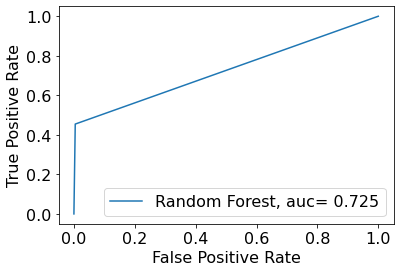

In [451]:
#preds = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_rf)#preds)
auc = metrics.roc_auc_score(Y_test, Y_pred_rf)
df_rf = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.plot(fpr,tpr,label="Random Forest, auc= %0.3f" %(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=0)

In [452]:
# Random Forests with weight using all data
random_forest = RandomForestClassifier(n_estimators=90, random_state=51, class_weight="balanced")
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
rf_accur = accuracy_score(Y_test, Y_pred_rf)
rf_accur

0.9482071713147411

In [453]:
## true predcitions

In [454]:
X_test

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
1209,1.000015,0.995746,0.929059,1.033683,0.387456,0.880038,0.559299
777,0.999581,1.007129,0.994354,1.033144,0.458999,1.008441,0.968752
979,0.999933,0.993329,0.939295,1.024877,0.424729,0.914985,0.760881
396,0.997932,1.011082,0.910036,0.709534,0.447526,0.771468,0.563825
37,0.998956,1.012699,0.872059,0.994302,0.391952,0.860446,0.907401
...,...,...,...,...,...,...,...
1138,0.999553,0.994761,0.942439,0.820497,1.056028,0.906930,0.939962
936,0.998444,0.982874,0.368188,0.485299,0.488579,0.497351,0.454363
400,0.991576,1.007585,0.876901,0.788409,0.499259,0.992565,0.972467
485,1.000864,0.999316,0.628434,0.814177,0.320351,0.882393,0.771546


In [477]:
merge_df_y.tail()

,row_ID,FCSFileName,TubeNumber,SampleNumber,Label,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
2508,2509,2867,3,359,zero,0.989274,1.018992,0.858880,0.956190,0.427122,0.984341,0.906711
2509,2510,2868,4,359,zero,0.991826,1.019118,0.532954,0.594074,0.440418,0.629358,0.971137
2510,2511,2869,5,359,zero,0.990634,1.018335,0.925578,0.684809,0.428087,0.780752,0.558135
2511,2512,2870,6,359,zero,0.991537,1.016796,0.889943,0.952091,0.425705,1.029792,0.604389
2512,2513,2871,7,359,zero,0.986330,1.031330,0.963288,0.995011,0.434848,0.923456,0.833917


In [457]:
merge_df_new_y = merge_df_y[['Label',
       'FS Lin', 'SS Log', 'FL1 Log', 'FL2 Log', 'FL3 Log', 'FL4 Log',
       'FL5 Log']].copy()

In [458]:
merge_df_new_y.shape

(1260, 8)

In [524]:
X_f = merge_df_new_y.drop("Label", axis=1)

In [525]:
Y_f = merge_df_new["Label"]

In [526]:
X_f.head()

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log
1253,0.999433,1.007723,1.012713,0.983906,0.405462,0.981781,0.989210
1254,0.999444,1.007350,0.802648,0.669653,0.409891,1.017935,0.894719
1255,0.999911,1.002863,0.768295,0.930439,0.402770,0.931054,0.874021
1256,0.991506,1.050516,0.594730,0.641954,0.401966,0.499396,0.883840
1257,1.000438,1.000742,0.896340,0.610771,0.403324,0.841047,0.605321


In [527]:
X_f.shape

(1260, 7)

In [528]:
Y_pred_rf = random_forest.predict(X_f)

In [492]:
random_forest.score(X_train, Y_train)

0.8612774451097804

In [ ]:
rf_accur = accuracy_score(Y_test, Y_pred_rf)

In [ ]:
rf_accur

In [518]:
final = Y_pred_rf.tolist()

In [519]:
len(final)

1260

In [529]:
Y_pred_rf[Y_pred_rf == 1].shape

(36,)

In [471]:
X_f['lab'] = Y_pred_rf

In [473]:
X_f.shape

(1260, 8)

In [474]:
X_f[X_f.lab==1]

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log,lab
1292,0.997737,0.987083,0.860388,0.745695,0.410311,0.587090,0.471987,1
1415,0.996397,1.007993,0.504253,0.450171,0.320698,1.003724,0.819384,1
1417,0.998763,1.003229,0.678471,0.287199,0.328013,0.847355,0.686725,1
1419,0.998468,1.004775,0.621428,0.751531,0.321245,0.751386,0.373983,1
1433,0.996269,1.004845,0.439245,0.531122,0.534065,0.588733,0.412892,1
1474,1.000330,1.004618,0.980350,0.687454,0.408210,0.827817,0.362141,1
1531,0.994258,1.003783,0.574126,0.599986,0.349634,0.684199,0.385051,1
1532,0.995686,1.006817,0.901793,0.986679,0.355710,0.887959,1.015747,1
1543,0.999117,1.005488,1.017817,0.732323,0.318213,0.799817,0.947009,1
1596,0.998359,0.993750,0.987678,1.012577,0.410809,0.961012,0.991156,1


In [475]:
X_f.tail()

,FS Lin,SS Log,FL1 Log,FL2 Log,FL3 Log,FL4 Log,FL5 Log,lab
2508,0.989274,1.018992,0.858880,0.956190,0.427122,0.984341,0.906711,0
2509,0.991826,1.019118,0.532954,0.594074,0.440418,0.629358,0.971137,0
2510,0.990634,1.018335,0.925578,0.684809,0.428087,0.780752,0.558135,0
2511,0.991537,1.016796,0.889943,0.952091,0.425705,1.029792,0.604389,0
2512,0.986330,1.031330,0.963288,0.995011,0.434848,0.923456,0.833917,0


In [476]:
2512/7

358.85714285714283

In [478]:
merge_df_y['lab'] = Y_pred_rf

In [498]:
merge_df_y[merge_df_y.lab2==0]['SampleNumber']

1253    180
1254    180
1255    180
1256    180
1257    180
       ... 
2508    359
2509    359
2510    359
2511    359
2512    359
Name: SampleNumber, Length: 1260, dtype: int64

In [483]:
len(merge_df_y[merge_df_y.lab==1]['SampleNumber'].unique().tolist())

24

In [484]:
v1 = merge_df_y[merge_df_y.lab==1]['SampleNumber'].unique().tolist()

In [509]:
merge_df_y['lab2'] = Y_pred_rf

In [510]:
len(merge_df_y[merge_df_y.lab2==1]['SampleNumber'].unique().tolist())

29

In [521]:
merge_df_y['lab3'] = Y_pred_rf

In [522]:
len(merge_df_y[merge_df_y.lab3==1]['SampleNumber'].unique().tolist())

30

In [531]:
merge_df_y['lab4'] = Y_pred_rf

In [532]:
len(merge_df_y[merge_df_y.lab4==1]['SampleNumber'].unique().tolist())

24

In [533]:
merge_df_y[merge_df_y.lab4==1]['SampleNumber'].unique().tolist()

[185,
 203,
 205,
 208,
 211,
 219,
 236,
 239,
 247,
 262,
 268,
 269,
 284,
 285,
 289,
 291,
 297,
 314,
 326,
 331,
 333,
 340,
 344,
 358]

In [534]:
merge_df_y[merge_df_y.lab==1]['SampleNumber'].unique().tolist()

[185,
 203,
 205,
 211,
 219,
 221,
 229,
 234,
 239,
 247,
 262,
 268,
 269,
 284,
 285,
 289,
 291,
 314,
 326,
 331,
 333,
 340,
 344,
 348]

In [537]:
finals = [x for x in merge_df_y[merge_df_y.lab4==1]['SampleNumber'].unique().tolist() if x in merge_df_y[merge_df_y.lab==1]['SampleNumber'].unique().tolist()]

In [538]:
finals

[185,
 203,
 205,
 211,
 219,
 239,
 247,
 262,
 268,
 269,
 284,
 285,
 289,
 291,
 314,
 326,
 331,
 333,
 340,
 344]

In [542]:
finals3 = [x for x in merge_df_y[merge_df_y.lab2==1]['SampleNumber'].unique().tolist() if x in merge_df_y[merge_df_y.lab==1]['SampleNumber'].unique().tolist()]

In [543]:
len(finals3)

23

In [541]:
finals2

[185,
 203,
 205,
 211,
 219,
 229,
 234,
 239,
 262,
 268,
 269,
 289,
 291,
 314,
 331,
 340,
 348]

In [544]:
finals3

[185,
 203,
 205,
 211,
 219,
 221,
 229,
 234,
 239,
 247,
 262,
 268,
 269,
 284,
 285,
 289,
 291,
 314,
 326,
 333,
 340,
 344,
 348]